In [1]:
import pandas as pd

In [8]:
dataSrc = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'

In [16]:
!wget $dataSrc

--2023-09-26 18:35:40--  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5788 (5.7K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   5.65K  --.-KB/s    in 0s      

2023-09-26 18:35:41 (66.8 MB/s) - ‘data.csv’ saved [5788/5788]



In [2]:
df = pd.read_csv('../../housing.csv')

In [3]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
columns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
df = df[columns]

In [4]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [23]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
 df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [27]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['ocean_proximity']

In [28]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [29]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


## EDA

In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

latitude
[37.64 37.61 37.57 37.58 37.49]
834

longitude
[-121.97 -121.99 -121.96 -121.98 -122.  ]
818

housing_median_age
[32.  9. 21. 15. 20.]
52

total_rooms
[1283. 3666. 4342. 3575. 4126.]
5428

total_bedrooms
[ 194.  711.  783.  597. 1031.]
1822

population
[ 485. 2341. 2172. 1777. 2079.]
3683

households
[171. 703. 789. 559. 975.]
1707

median_income
[6.0574 4.6458 4.6146 5.7192 3.6832]
10434

median_house_value
[431000. 217000. 247600. 283500. 216900.]
3493



In [6]:
df.isnull().sum()
# df['population'].describe()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Data distribution

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

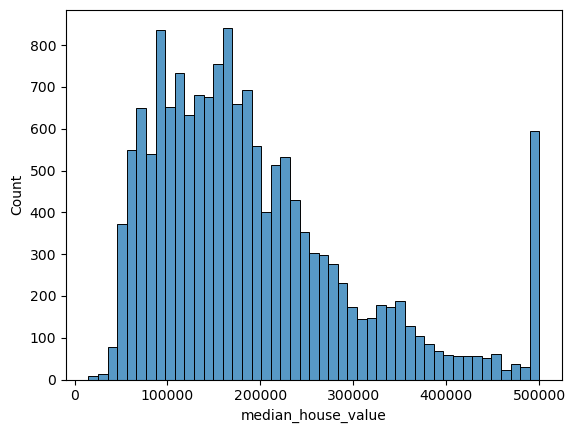

In [14]:
sns.histplot(df['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='Count'>

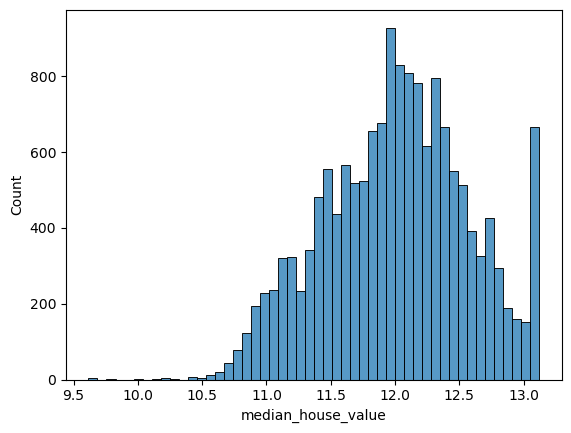

In [15]:
house_prices_log = np.log1p(df['median_house_value'])
sns.histplot(house_prices_log, bins = 50)

## Setup the validation framework

In [42]:
def split_dataset(data, train_percent, test_percent, val_percent): 
    n = len(data)

    n_val = int( n*val_percent)
    n_test = int(n*test_percent)
    n_train = n - (n_val + n_test)
    ## Create index of n range 
    idx = np.arange(n)
    np.random.seed(9)
    np.random.shuffle(idx)
    ## Split the data
    df_train = data.iloc[idx[:n_train]]
    df_test = data.iloc[idx[n_train:n_train+n_test]]
    df_val = data.iloc[idx[n_train+n_test]:]
    ## Resort the indexes
    df_train = df_train.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    
    return df_train, df_test, df_val

### Split the data

In [43]:
df_train, df_test, df_val = split_dataset(df, 0.6, 0.2, 0.2)

In [40]:

df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.85,-121.65,20.0,2606.0,424.0,1361.0,426.0,4.5787,245100.0
1,33.90,-118.34,36.0,1158.0,219.0,628.0,253.0,4.7426,242700.0
2,33.28,-117.28,13.0,6131.0,1040.0,4049.0,940.0,3.8156,150700.0
3,34.02,-118.48,22.0,1249.0,483.0,1106.0,481.0,2.5261,375000.0
4,37.68,-121.77,36.0,1687.0,372.0,950.0,372.0,3.5532,158400.0
...,...,...,...,...,...,...,...,...,...
9408,34.18,-118.92,17.0,2400.0,352.0,1067.0,323.0,6.3522,259300.0
9409,34.04,-117.24,5.0,1775.0,234.0,726.0,222.0,7.9780,223900.0
9410,38.40,-122.89,22.0,2900.0,538.0,1445.0,515.0,4.5110,296800.0
9411,37.81,-121.22,17.0,2879.0,542.0,1802.0,530.0,3.6378,126100.0


## Fill missing Data

In [27]:
# df_train = df_train.fillna(0)
# df_test = df_test.fillna(0)
# df_val = df_val.fillna(0)

df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(df_train['total_bedrooms'].mean())
df_test['total_bedrooms'] = df_test['total_bedrooms'].fillna(df_test['total_bedrooms'].mean())
df_val['total_bedrooms'] = df_val['total_bedrooms'].fillna(df_val['total_bedrooms'].mean())

df_train['total_bedrooms'].describe()

count    9413.000000
mean      533.522363
std       433.697213
min         0.000000
25%       289.000000
50%       429.000000
75%       641.000000
max      6445.000000
Name: total_bedrooms, dtype: float64

In [18]:
y_train = np.log1p(df_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)

In [19]:
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

## Logistic regression vectorized

In [44]:
def dot (x, w):
    n = len(x)
    result = 0
    for j in range(n):
        result += x[j] * w[j]
    
    return result

In [45]:
def logistic_regression(xi):
    return b + dot(xi, w)

In [46]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_vector = XTX_inv.dot(X.T).dot(y)
    
    return w_vector[0],w_vector[1:]
    
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_vector = XTX_inv.dot(X.T).dot(y)
    
    return w_vector[0],w_vector[1:]
    

In [47]:
def preprocess_X(df):
    df = df.fillna(0)
    X = df.values
    
    return X

In [30]:
X_train = df_train.values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)


In [31]:
y_pred

array([12.34789408, 12.3820726 , 11.89701651, ..., 12.28690912,
       11.80164626, 12.20547073])

## RMSE

In [49]:
def rmse(y_pred, y_actual):
    error = y_actual - y_pred
    sq_error = error ** 2
    mse = sq_error.mean()
    
    return np.sqrt(mse)
    

In [50]:
round(rmse(y_pred, y_train), 2)

ValueError: operands could not be broadcast together with shapes (9413,) (3137,) 

In [52]:
X_train = preprocess_X(df_test)
w0, w = train_linear_regression_reg(X_train, y_test)
y_pred = w0 + X_train.dot(w)

round(rmse(y_pred, y_test), 3)

0.567